 
# Variable	     Definition	                               Key

* survival	:            Survival	                                 0 = No, 1 = Yes
* pclass	:                Ticket class	                             1 = 1st, 2 = 2nd, 3 = 3rd
* sex	    :                Sex	
* Age	    :                Age in years	
* sibsp	    :            # of siblings / spouses aboard the Titanic	
* parch	    :            # of parents / children aboard the Titanic	
* ticket	:               Ticket number	
* fare	    :            Passenger fare	
* cabin	    :            Cabin number	
* embarked	:            Port of Embarkation	                          C = Cherbourg, Q = Queenstown, S = Southampton


* pclass: A proxy for socio-economic status (SES)
     1st = Upper
     2nd = Middle
     3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
     Sibling = brother, sister, stepbrother, stepsister
     Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
     Parent = mother, father
     Child = daughter, son, stepdaughter, stepson
     Some children travelled only with a nanny, therefore parch=0 for them.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r'C:\Users\rachn\Downloads\train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
data.shape

(891, 12)

# Filling Missing Values

In [10]:
data['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
data['Embarked'].fillna(value = 'S' , inplace = True)


<AxesSubplot:>

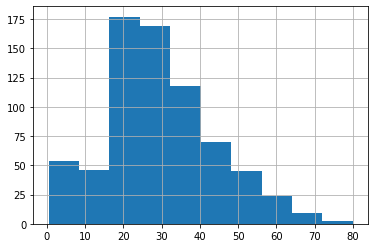

In [12]:
data['Age'].hist()

In [13]:
data['Age'].fillna(data['Age'].mean() , inplace = True)


# Data Visualisation

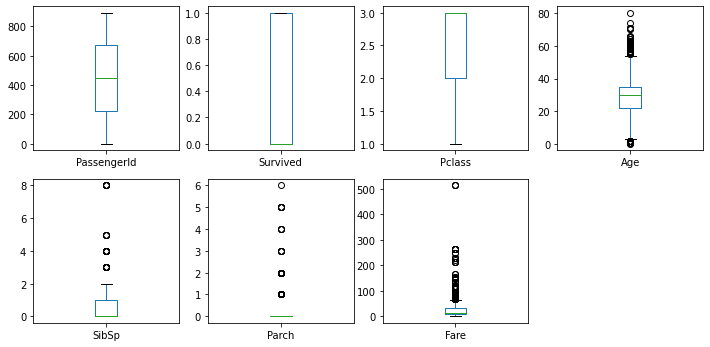

In [14]:
data.plot(kind = 'box', subplots = True ,layout = (3,4),figsize = (12,9),sharex = False , sharey= False)
plt.show()

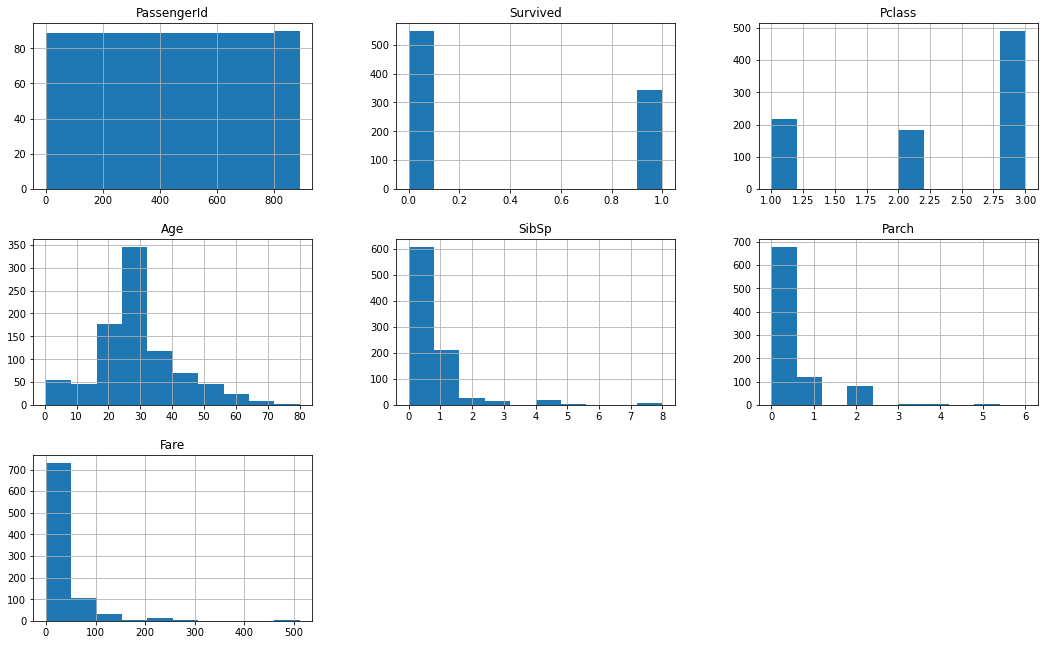

In [15]:
data.hist(figsize = (18,11))
plt.show()

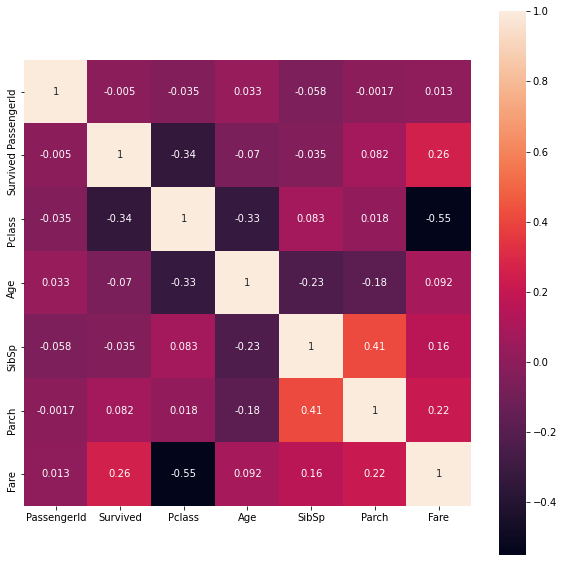

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), square = True , annot = True)
plt.show()

In [17]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

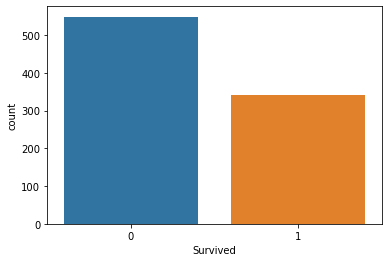

In [18]:
sns.countplot('Survived', data = data)

In [19]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

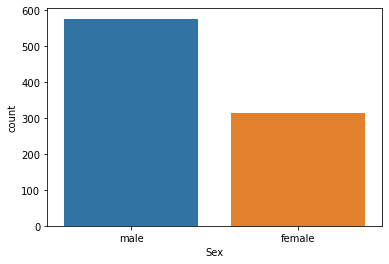

In [20]:
sns.countplot('Sex',data = data)

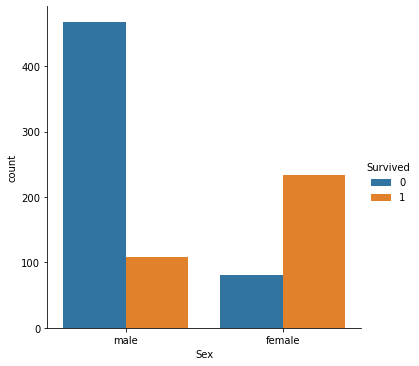

In [21]:
sns.catplot(x = 'Sex' , hue = 'Survived' , kind = 'count', data = data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

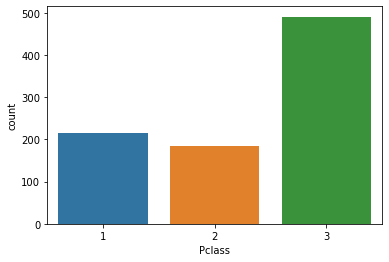

In [22]:
sns.countplot('Pclass',data = data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

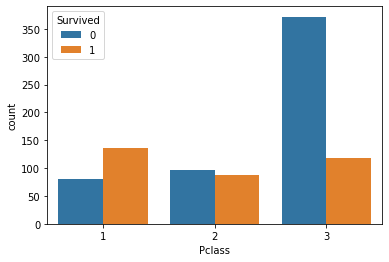

In [23]:
sns.countplot('Pclass',hue = 'Survived',data = data)

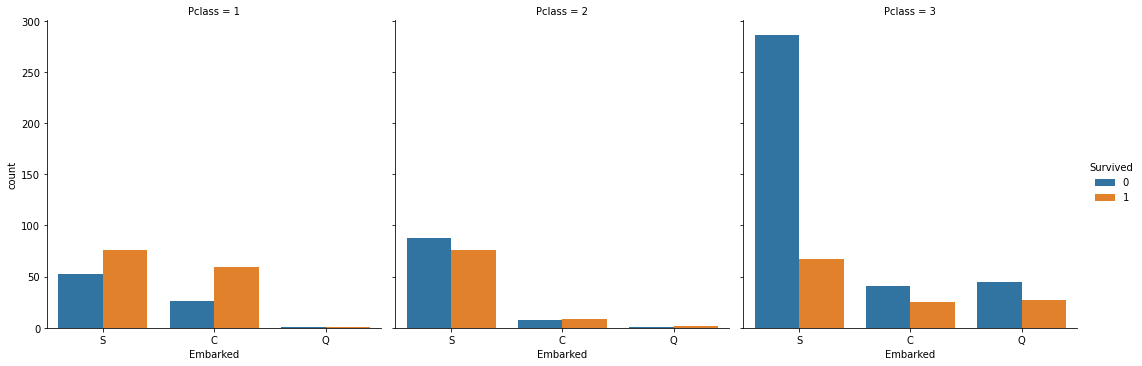

In [24]:
sns.catplot(x = 'Embarked',hue = 'Survived',kind = 'count',col = 'Pclass', data = data)

# Drop Irrelevant Columns

In [25]:
data.drop(['Name','PassengerId','Ticket','Cabin'] , axis = 1 , inplace = True)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


# Label Encodding

In [26]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data["Embarked"] = lab.fit_transform(data["Embarked"])
data["Embarked"].head(10)

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
Name: Embarked, dtype: int32

In [27]:
gender=pd.get_dummies(data["Sex"], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
data = pd.concat((data,gender),axis=1)
data = data.drop(["Sex"],axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
 7   male      891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(1)
memory usage: 46.2 KB


# Split data into Dependent and Independent Variable

In [30]:
X = data.drop(['Survived'],axis = 1)
y = data['Survived']

In [31]:
X

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,22.000000,1,0,7.2500,2,1
1,1,38.000000,1,0,71.2833,0,0
2,3,26.000000,0,0,7.9250,2,0
3,1,35.000000,1,0,53.1000,2,0
4,3,35.000000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,2,1
887,1,19.000000,0,0,30.0000,2,0
888,3,29.699118,1,2,23.4500,2,0
889,1,26.000000,0,0,30.0000,0,1


In [32]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [33]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [34]:
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(712, 7) (179, 7) (712,) (179,)


# Train the Model using LogisticRegression 

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
X_train_pred = model.predict(X_train)
print(X_train_pred)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [38]:
accuracy_score(y_train, X_train_pred)

0.8132022471910112

# Accuracy On test data

In [39]:
X_test_pred = model.predict(X_test)
X_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [40]:
accuracy_score(y_test,X_test_pred)

0.7877094972067039